In [14]:
import sys
from packaging import version
import sklearn
import numpy as np

In [15]:
# Importando e configurando fontsize dos plots

import matplotlib.pyplot as plt
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [16]:
#Instalar watermark para ver as versões utilizada neste jupyter notebook

! pip install -q watermark

In [17]:
%reload_ext watermark
%watermark -a "Daniel Henrique" --iversions

Author: Daniel Henrique

numpy     : 1.23.3
sys       : 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:30:19) [MSC v.1929 64 bit (AMD64)]
packaging : 21.3
matplotlib: 3.5.3
sklearn   : 1.1.2



# 1-1 Exemplo Simples de Regressão Linar

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


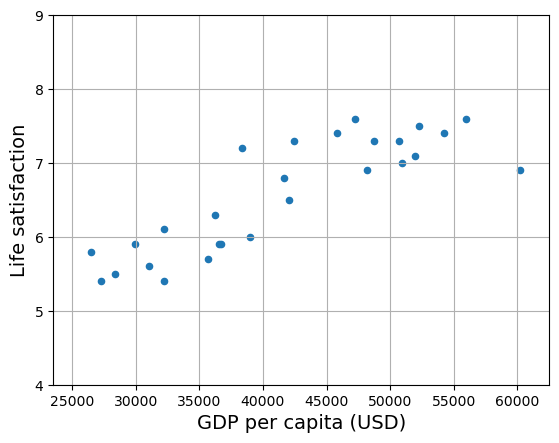

In [30]:

# Criando grafico de dispersao com as variáveis GDP per capita (USD) no eixo X e Life satisfaction no eixo Y
lifesat.plot(kind="scatter", x="GDP per capita (USD)", y="Life satisfaction", grid=True)

# Ajustando plots maximo e minimo 
plt.axis([23500, 62500, 4, 9])
plt.show()


Com o gráfico simples acima podemos deduzir que há uma correlação positiva entre as duas variáveis

Vamos criar uma regressão básica só para exemplo

In [35]:
# Select a linear model
model = LinearRegression()

# Converter os valores para vetores numpy com shape (1,x), pois é assim que o algoritmo espera receber
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Treinar o modelo
model.fit(X, y)

# Fazer uma previsão
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020

# Imprimir o modelo para o novo dado de entrada
print(model.predict(X_new))


[[6.30165767]]


Testando com o algortimo KNN, observe que o resultado é basicamente o mesmo

In [36]:
# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
print(model.predict(X_new)) 

[[6.33333333]]


In [37]:
from pathlib import Path

# Função para salvar imagens
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Baixe os dados do Índice de Vida Melhor (BLI) do site da OCDE (para obter a Satisfação com a Vida de cada país) e os dados do PIB per capita do Banco Mundial em OurWorldInData.org. No livro de ageron conseguimos acesso do csv pelo link do github, localizado codigo abaixo (dados até 2020).

In [38]:
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [41]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [42]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


Processar a OECD BLI dados somente onde Life satisfaction column igual a TOT


In [76]:
#Basicamente agrupando os dados por pais e indicator de acordo com a coluna value agregada 

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()


Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


Agora fazer o merge entre 'life satisfaction' e GDP per capita data, mantendo somente as colunas GDP per capita e Life satisfaction :



In [85]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True) #index is Country
full_country_stats.sort_values(by=gdppc_col, inplace=True) # gdppc_col = 'GDP per capita (USD)'
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


Para ilustrar o risco de overfitting, uso apenas parte dos dados na maioria no range min_gdp e max_gdp. Mais adiante mostraremos os países desaparecidos e que eles não tendem a mesma tendencia linear

In [91]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [92]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

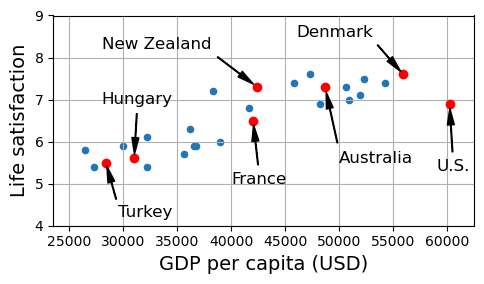

In [108]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

#Adicionando anotação (setas) 

# Percorrendo o dicionario de tuplas
for country, pos_text in position_text.items(): 

    # setando valores de data 
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]

    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('money_happy_scatterplot')
plt.show()

In [109]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)


,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


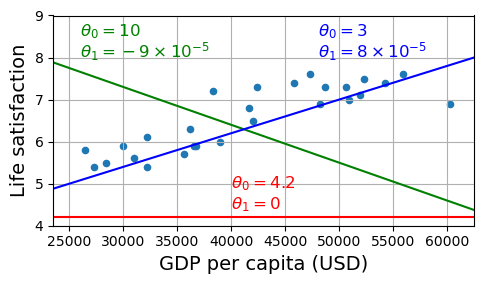

In [116]:
#Exemplo de linha de regressão

#Plot Scatter da distribuição
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000) #Criando uma distribuição linear de 23500 a 62500 no eixo x


# As linhas de regressão a seguir é dado pela equação (w1 + w2 * 1e-5  * x) para cada elemento da distribuição linear acima

#Linha de Vermelha
w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

#Linha verde
w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

#Linha azul
w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('tweaking_model_params_plot')
plt.show()

In [117]:
#Extraindo a intercept w1 e o coeficiente linear w2 

from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


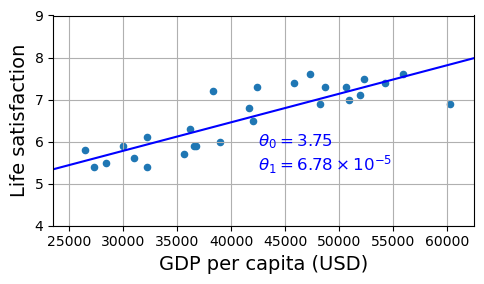

In [125]:
#Plot com a regressao treinada
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('best_fit_model_plot')
plt.show()

In [130]:
#Extraindo valor real gdp gdppc_col pais Cyprus
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

37655.1803457421

In [132]:
#Extraindo valor previsto pelo modelo para pais Cyprus
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

6.301656332738055

In [143]:
#Resumo Cyprus
print("cyprus_gdp_per_capita: ", cyprus_gdp_per_capita)
print("cyprus_predicted_life_satisfaction: ", cyprus_predicted_life_satisfaction)
print("min_life_sat: ", min_life_sat)


cyprus_gdp_per_capita:  37655.1803457421
cyprus_predicted_life_satisfaction:  6.301656332738055
min_life_sat:  4


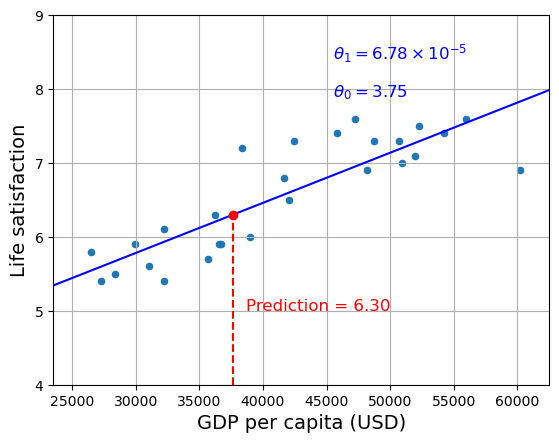

In [147]:
#Plot da predição

country_stats.plot(kind="scatter", x=gdppc_col, y=lifesat_col, grid=True)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

# Ponto vermelho -> life satisfaction prevista 
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

# Linha vermelha
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")

# Texto Prediction
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()


In [181]:
# Extraindo valores menos que utilizados min_gdp e maior que max_gdp
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]

missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


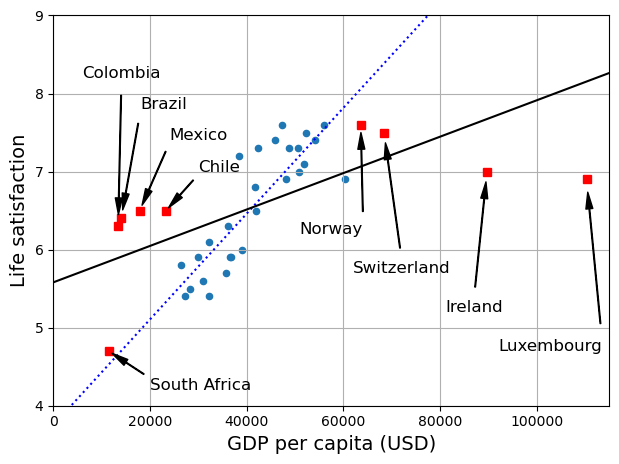

In [197]:
# Posicao dos textos para o plot dos dados
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

full_country_stats.plot(kind="scatter",
                        x=gdppc_col, y=lifesat_col, grid=True)

#Plot das setas e quadrados dos itens position_text_missing_countries
for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))

    plt.plot(pos_data_x, pos_data_y, "rs")


#Distribuição linear de 0 a 115000 com 1000 numeros para o eixo X
X = np.linspace(0, 115_000, 1000)

# Linha pontilhada azul
plt.plot(X, t0 + t1 * X, "b:")

# Criando modelo de regressao com todos os dados
lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

#Pegando intercept e coeficiente do modelo lin_reg_full
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

#Linha Preta
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

#Ajustando escala do grafico
plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('representative_training_data_scatterplot')

plt.show()


Veja que os pontos de dados mais a direita a linha de regressão azul não consegue "explicar"

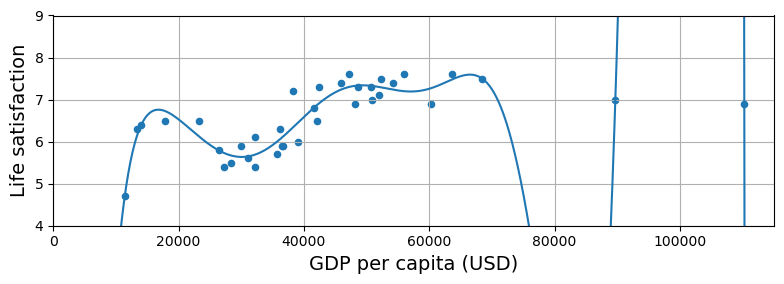

In [220]:
#Modelo com Overffiting

from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)


poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])

plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('overfitting_model_plot')
plt.show()


In [243]:
# Extraindo paises que contem a letra W
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
print(w_countries)

full_country_stats.loc[w_countries][lifesat_col]

['New Zealand', 'Sweden', 'Norway', 'Switzerland']


Country
New Zealand    7.3
Sweden         7.3
Norway         7.6
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [242]:
#Extraindo todos os paises que contem a letra W 
all_w_countries = [c for c in gdp_per_capita.index if "W" in c.upper()]
gdp_per_capita.loc[all_w_countries].sort_values(by=gdppc_col)

['Africa Western and Central', 'Arab World', 'Botswana', 'Eswatini', 'Low & middle income', 'Lower middle income', 'Malawi', 'New Zealand', 'Norway', 'Papua New Guinea', 'Rwanda', 'Sweden', 'Switzerland', 'World', 'Zimbabwe']


,GDP per capita (USD)
Country,
Malawi,1486.778248
Rwanda,2098.710362
Zimbabwe,2744.690758
Africa Western and Central,4003.158913
Papua New Guinea,4101.218882
Lower middle income,6722.809932
Eswatini,8392.717564
Low & middle income,10293.855325
Arab World,13753.707307


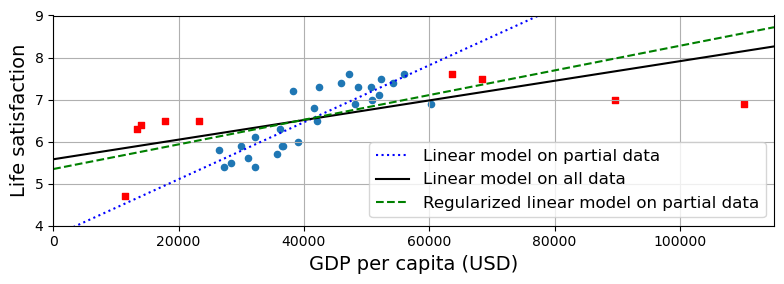

In [250]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

#Criando Regressao Ridge
ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
#Capturando intercept e coef do modelo de regressao
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]

#Plotando modelo de Regressao Riodge
plt.plot(X, t0ridge + t1ridge * X, "g--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('ridge_model_plot')
plt.show()

1. Definição básica de Machine Learning?

Machine Learning é sobre construir sistemas que podem aprender com dados. Aprender significa melhorar em alguma tarefa, dada alguma medida de desempenho

2. Quatro Cenários Tipicos

O aprendizado de máquina é ótimo para problemas complexos para os quais não temos solução algorítmica (uma equação pronta), substituir longas listas de regras ajustadas manualmente, para construir sistemas que se adaptam a ambientes flutuantes e, finalmente, para ajudar axuliar o humano em tarefas (por exemplo, mineração de dados).

3. O que é Labeled Training Set
Um conjunto de treinamento rotulado é um conjunto de treinamento que contém a solução desejada (também conhecida como rótulo) para cada instância.

4. Nome de quatro comuns tarefas não supervisionadas

Clustering, Dimensionality Reduction, Association rule larning, visualization.


5. Qual algoritmo você usaria para permitir que um robo andasse em varios terrenos desconhecidos?

É provável que o aprendizado por reforço tenha melhor desempenho se quisermos que um robô aprenda a andar em vários lugares desconhecidos, uma vez que este é tipicamente o tipo de problema que o Aprendizado por Reforço aborda. Pode ser possível expressar o problema como um problema de aprendizagem supervisionado ou semi-supervisionado, mas seria menos natural.

6. Que tipo de algoritmo você usaria para segmentar seus clientes em vários grupos?

Se você não souber definir os grupos, poderá usar um algoritmo de clustering (aprendizagem não supervisionada) para segmentar seus clientes em clusters de clientes semelhantes. No entanto, se você souber quais grupos gostaria de ter, poderá inserir muitos exemplos de cada grupo em um algoritmo de classificação (aprendizado supervisionado) e ele classificará todos os seus clientes nesses grupos.

7. O que é um sistema de aprendizagem online?

Um sistema de aprendizado online pode aprender de forma incremental, ao contrário de um sistema de aprendizado em lote. Isso o torna capaz de se adaptar rapidamente a dados em mudança e sistemas autônomos, e de treinar em grandes quantidades de dados.

8. O que é aprendizagem fora do núcleo (Out-of-core)?

Algoritmos fora do núcleo podem lidar com grandes quantidades de dados que não cabem na memória principal de um computador. Um algoritmo de aprendizado fora do núcleo divide os dados em minilotes e usa técnicas de aprendizado online para aprender com esses minilotes.

9. Que tipo de algoritmo depende de uma medida de similaridade para fazer previsões?

Um sistema de aprendizado baseado em instâncias aprende os dados de treinamento de cor; então, quando recebe uma nova instância, ele usa uma medida de similaridade para encontrar as instâncias aprendidas mais semelhantes e as usa para fazer previsões.

10. Qual é a diferença entre um parâmetro de modelo e um hiperparâmetro de modelo?

Um modelo tem um ou mais parâmetros de modelo que determinam o que ele irá prever em uma nova instância (por exemplo, a inclinação de um modelo linear). Um algoritmo de aprendizado tenta encontrar valores ótimos para esses parâmetros de modo que o modelo generalize bem para novas instâncias. hiperparâmetro é um parâmetro do próprio algoritmo de aprendizado, não do modelo (por exemplo, a quantidade de regularização a ser aplicada).

11. O que os algoritmos baseados em modelo procuram? Qual é a estratégia mais comum que eles usam para ter sucesso? Como eles fazem previsões?

Os algoritmos de aprendizado baseados em modelo buscam um valor ideal para os parâmetros do modelo, de modo que o modelo generalize bem para novas instâncias. Geralmente treinamos esses sistemas minimizando uma função de custo que mede quão ruim o sistema é em fazer previsões sobre os dados de treinamento, além de uma penalidade pela complexidade do modelo se o modelo for regularizado. Para fazer previsões, alimentamos os recursos da nova instância na função de previsão do modelo, usando os valores dos parâmetros encontrados pelo algoritmo de aprendizado.

12. Principais desafios em Machine Learning.

Alguns dos principais desafios em Aprendizado de Máquina são a falta de dados, baixa qualidade de dados, dados não representativos, recursos não informativos, modelos excessivamente simples que se adéquam aos dados de treinamento e modelos excessivamente complexos que superajustam os dados.

13. Se o seu modelo tiver um ótimo desempenho nos dados de treinamento, mas generalizar mal para novas instâncias, o que está acontecendo? Você pode citar três soluções possíveis.

Se um modelo tem um ótimo desempenho nos dados de treinamento, mas generaliza mal para novas instâncias, o modelo provavelmente está superajustando (Overfitting) os dados de treinamento (ou tivemos muita sorte nos dados de treinamento). Possíveis soluções para o overfitting são obter mais dados, simplificar o modelo (selecionar um algoritmo mais simples, reduzir o número de parâmetros ou recursos usados ​​ou regularizar o modelo) ou reduzir o ruído nos dados de treinamento.

14. O que é um conjunto de teste e por que você deseja usá-lo?
Um conjunto de teste é usado para estimar o erro de generalização que um modelo fará em novas instâncias, antes que o modelo seja lançado em produção.

15. Qual é o propósito de um conjunto de validação?

Um conjunto de validação é usado para comparar modelos. Possibilita selecionar o melhor modelo e ajustar os hiperparâmetros.

16. Qual é o conjunto train-dev, quando você precisa dele e como você o usa?

O conjunto train-dev é usado quando há risco de incompatibilidade entre os dados de treinamento e os dados usados ​​nos conjuntos de dados de validação e teste (que devem sempre estar o mais próximo possível dos dados usados ​​quando o modelo estiver em produção). O modelo é treinado no restante do conjunto de treinamento e avaliado no conjunto train-dev e no conjunto de validação. Se o modelo tem um bom desempenho no conjunto de treinamento, mas não no conjunto train-dev, então o modelo provavelmente está superajustando o conjunto de treinamento. Se ele tiver um bom desempenho tanto no conjunto de treinamento quanto no conjunto train-dev, mas não no conjunto de validação, provavelmente há uma incompatibilidade de dados significativa entre os dados de treinamento e a validação + teste data, e você deve tentar melhorar os dados de treinamento para torná-los mais parecidos com os dados de validação + teste.

17.O que pode dar errado se você ajustar os hiperparâmetros usando o conjunto de teste?

Se você ajustar os hiperparâmetros usando o conjunto de teste, corre o risco de superajustar o conjunto de teste e o erro de generalização medido será otimista (você pode lançar um modelo com desempenho pior do que o esperado).